In [288]:
import numpy as np
import pandas as pd
import uproot as up 
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.path import Path
from matplotlib.collections import LineCollection
import imageio.v2 as imageio  # v2 pour éviter des warnings
from natsort import natsorted
print(os.getcwd())
%load_ext autoreload
%autoreload 2

import my_functions as fct

from IPython.core.interactiveshell import InteractiveShell #Pour controler l'affichage des outputs des cellules

show_all_output = False

if show_all_output :
    InteractiveShell.ast_node_interactivity = "all"
else :
    InteractiveShell.ast_node_interactivity = "last_expr"

/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Déclaration des variables utiles

In [289]:
Adc_to_mV = 0.29175
Qt2t_to_pC = 0.16699

on_lab_desktop = False
on_my_laptop = not on_lab_desktop

plot = True
save = False
GIF_gen = False

if GIF_gen:
    plot = False

if save == True :
    if on_lab_desktop == True:
        save_dir_path = "/home/vezon/Bureau/RHB2/fig_New_plast"
    if on_my_laptop == True:
        #save_dir_path = "/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/Figure_analyse_acq"
        save_dir_path = "/Users/antoinevezon/Desktop/Point_du_04_07/PS_selection/PS_sel_Empty_V2"
else :
    save_dir_path = None

print_df = True
print_df_clean = True
print_df_sat_ch = False
print_df_nosat_ch = False
print_df_sat_all = False
print_df_nosat = False

# Choix du fichier root à analyser 

In [290]:
rootfile_name_a = "GorG2orG4orG24.root"
rootfile_name_b = "GorG2orG4orG24_V2.root"
rootfile_name_c = "GorG2orG4orG24_100ns.root"
rootfile_name_d = "1bar_GorG2orG4orG24.root"
rootfile_name_e = "1bar_GorG2orG4orG24_10cm.root"
rootfile_name_f = "1.5bar_GorG2orG4orG24.root"
rootfile_name_g = "coind_10h_close.root"
rootfile_name_h = "coind_10h_vertical_close.root"
rootfile_name_i = "10h_coind_vert_close_2.root"
rootfile_name_j = "mult2_24567_long.root"
rootfile_name_k = "mult2_24567_long_TrigW50.root"
rootfile_name_l = "coind_10h_3PMP.root"
rootfile_name_m = "coind_10h_3PMP_200ns.root"

rootfile_name_n = "New_plastics_atleastGAD_500mbar.root"  # \
rootfile_name_o = "New_plastics_atleastGAD_1000mbar.root" #  |--> QDC_2 = Right_plastic & QDC_4 = Left_plastic ! Il faut les échanger pour etre identique à Empty  
rootfile_name_p = "New_plastics_atleastGAD_1500mbar.root" # /
rootfile_name_q = "New_plastics_atleastGAD_Empty.root"
rootfile_name_r = "New_plastics_atleastGAD_Empty_V2.root"

##################################
rootfile_use = rootfile_name_q
##################################

# Lecture du DataTree

In [291]:
if on_lab_desktop == True:
    path_to_DataTree_1 = f"/home/vezon/Bureau/RHB2/{rootfile_use}:DataTree;1"
if on_my_laptop == True:
    path_to_DataTree_1 = f"/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/{rootfile_use}:DataTree;1"
        
DataTree_1 = up.open(path_to_DataTree_1)

DataTree_1.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
group_time           | double                   | AsDtype('>f8')
QDC_2                | int32_t                  | AsDtype('>i4')
QDC_4                | int32_t                  | AsDtype('>i4')
QDC_2_sat            | bool                     | AsDtype('bool')
QDC_4_sat            | bool                     | AsDtype('bool')
QDC_2_q2             | int32_t                  | AsDtype('>i4')
QDC_4_q2             | int32_t                  | AsDtype('>i4')
QDC_2_q2_sat         | bool                     | AsDtype('bool')
QDC_4_q2_sat         | bool                     | AsDtype('bool')
QT2T_5_q             | int32_t                  | AsDtype('>i4')
QT2T_6_q             | int32_t                  | AsDtype('>i4')
QT2T_7_q             | int32_t                  | AsDtype('>i4')
QT2T_5_width         | int32_t                  | AsDt

# DataTree en Dataframe

In [292]:
df = DataTree_1.arrays(["group_time","QDC_2","QDC_4","QT2T_5_q","QT2T_6_q","QT2T_7_q"
                      ,"Counter_2","Counter_4","Counter_5","Counter_6","Counter_7"
                      ,"Counter_mult_2","Counter_mult_4","Counter_mult_5","Counter_mult_6","Counter_mult_7"
                      ,"QT2T_5_max_amp","QT2T_6_max_amp","QT2T_7_max_amp"
                      ,"QT2T_5_q_base_line","QT2T_6_q_base_line","QT2T_7_q_base_line" 
                      ,"QDC_2_sat","QDC_4_sat","QT2T_5_sat","QT2T_6_sat","QT2T_7_sat"], library="pd")
df

,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,-999999,29162,280,23202,18998,0,1,1,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,-999999,-999999,146,521,79,0,0,1,1,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,-999999,-999999,274,177,118,0,0,1,1,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,-999999,-999999,354,559,21046,0,0,1,1,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,-999999,-999999,489,10207,302,0,0,1,1,...,1719,74,1,31,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176670,3.264343e+14,-999999,-999999,307,229,17826,0,0,1,1,...,64,3113,2,6,10,False,False,False,False,True
176671,3.264370e+14,506,-999999,27559,933,900,1,0,1,1,...,186,186,8,12,-3,False,False,True,False,False
176672,3.264375e+14,-999999,-999999,337,8318,36,0,0,1,1,...,1311,36,31,6,88,False,False,False,False,False
176673,3.264387e+14,-999999,-999999,201,2780,586,0,0,1,1,...,514,131,31,-9,-15,False,False,False,False,False


# Echange du CONTENU de QCD_2 et QCD_4  (sans échanger le nom des col) pour les acquisitions de Victor. 

Il vaut mieux "and" que "&" pour les test logiques sur des strings.Mon code fonctionne avec "&" ici parce que je manipule deux booléens simples, mais la bonne pratique reste d’utiliser "and" pour les : if ... and ... 

In [293]:
if rootfile_use.startswith("New_plastics_atleastGAD_") and rootfile_use.endswith("mbar.root"):
    
    print("Avant échange:", df[["QDC_2", "QDC_4"]].head())  
    
    stock1 = df["QDC_2"].copy() #on stock une copie de QDC_2
    df["QDC_2"] = df["QDC_4"]
    df["QDC_4"] = stock1
    
    print("Aprés échange:", df[["QDC_2", "QDC_4"]].head())

    stock2 = df["Counter_2"].copy()
    df["Counter_2"] = df["Counter_4"]                                                                 
    df["Counter_4"] = stock2

    stock2 = df["Counter_mult_2"].copy()
    df["Counter_mult_2"] = df["Counter_mult_4"]                                                                 
    df["Counter_mult_4"] = stock2

    stock2 = df["QDC_2_sat"].copy()
    df["QDC_2_sat"] = df["QDC_4_sat"]                                                                 
    df["QDC_4_sat"] = stock2
df
#print("df_descibr :",df.describe())
#print("df.index",df.index, "\n df.columns",df.columns)
#df.loc[row,column]

,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,-999999,29162,280,23202,18998,0,1,1,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,-999999,-999999,146,521,79,0,0,1,1,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,-999999,-999999,274,177,118,0,0,1,1,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,-999999,-999999,354,559,21046,0,0,1,1,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,-999999,-999999,489,10207,302,0,0,1,1,...,1719,74,1,31,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176670,3.264343e+14,-999999,-999999,307,229,17826,0,0,1,1,...,64,3113,2,6,10,False,False,False,False,True
176671,3.264370e+14,506,-999999,27559,933,900,1,0,1,1,...,186,186,8,12,-3,False,False,True,False,False
176672,3.264375e+14,-999999,-999999,337,8318,36,0,0,1,1,...,1311,36,31,6,88,False,False,False,False,False
176673,3.264387e+14,-999999,-999999,201,2780,586,0,0,1,1,...,514,131,31,-9,-15,False,False,False,False,False


# -999999 to NaN


In [294]:

df_clean=df.where(df != -999999)

df_clean


,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,NaN,29162.0,280,23202,18998,0,1,1,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,NaN,NaN,146,521,79,0,0,1,1,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,NaN,NaN,274,177,118,0,0,1,1,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,NaN,NaN,354,559,21046,0,0,1,1,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,NaN,NaN,489,10207,302,0,0,1,1,...,1719,74,1,31,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176670,3.264343e+14,NaN,NaN,307,229,17826,0,0,1,1,...,64,3113,2,6,10,False,False,False,False,True
176671,3.264370e+14,506.0,NaN,27559,933,900,1,0,1,1,...,186,186,8,12,-3,False,False,True,False,False
176672,3.264375e+14,NaN,NaN,337,8318,36,0,0,1,1,...,1311,36,31,6,88,False,False,False,False,False
176673,3.264387e+14,NaN,NaN,201,2780,586,0,0,1,1,...,514,131,31,-9,-15,False,False,False,False,False


# AJOUT DE LA COLONNE QT2T_sum_q APRES QT2T_7_q

Attention: si on utilise df["QT2T_sum_q"] = df["QT2T_5_q"] + df["QT2T_6_q"] + df["QT2T_7_q"] 
    car si ne serait-ce qu'un QT2T_n_q = NaN la somme sur cette ligne vaut NaN (pas notre cas car on a "at least G")
   Si necessaire utiliser df["QT2T_sum_q"] = df[["QT2T_5_q", "QT2T_6_q", "QT2T_7_q"]].sum(axis=1)
    qui accepte les sommes partielles avec des NaN qui sont juste ignorait (i.e = 0)

In [295]:
col_7q = df_clean.columns.get_loc("QT2T_7_q") #numero de colonne de 0 à n-1

df_clean.insert(loc=col_7q+1, column="QT2T_sum_q",value=df_clean[["QT2T_5_q", "QT2T_6_q", "QT2T_7_q"]].sum(axis=1))

df_clean.filter(like="_q").head()


,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line
0,280,23202,18998,42480,-9,6,-5
1,146,521,79,746,33,13,53
2,274,177,118,569,-13,-6,21
3,354,559,21046,21959,16,16,34
4,489,10207,302,10998,1,31,4


# AJOUT DE LA COLONNE QDC_sum APRES QDC_4 

In [296]:
col_4qdc = df_clean.columns.get_loc("QDC_4")

df_clean.insert(loc=col_4qdc+1, column="QDC_sum",value=df_clean[["QDC_2","QDC_4"]].sum(axis=1))

df_clean.filter(like="QDC").head()
df_clean.filter(like="_").head()


,group_time,QDC_2,QDC_4,QDC_sum,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,Counter_2,Counter_4,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.523387e+08,NaN,29162.0,29162.0,280,23202,18998,42480,0,1,...,3195,3181,-9,6,-5,False,False,False,True,True
1,4.995414e+09,NaN,NaN,0.0,146,521,79,746,0,0,...,119,41,33,13,53,False,False,False,False,False
2,8.096720e+09,NaN,NaN,0.0,274,177,118,569,0,0,...,49,42,-13,-6,21,False,False,False,False,False
3,8.412110e+09,NaN,NaN,0.0,354,559,21046,21959,0,0,...,117,3309,16,16,34,False,False,False,False,True
4,1.187954e+10,NaN,NaN,0.0,489,10207,302,10998,0,0,...,1719,74,1,31,4,False,False,False,False,False


# AJOUT DE LA COLONNE QT2T_sum_max_amp APRES QT2T_7_max_amp 

In [297]:
col_7a = df_clean.columns.get_loc("QT2T_7_max_amp") 

df_clean.insert(loc=col_7a+1, column="QT2T_sum_max_amp",value=df_clean[["QT2T_5_max_amp", "QT2T_6_max_amp", "QT2T_7_max_amp"]].sum(axis=1))

# AJOUT DE LA COLONNE Counter_sum APRES Counter_7

In [298]:
col_c7 = df_clean.columns.get_loc("Counter_7") 

df_clean.insert(loc=col_c7+1, column="Counter_sum",value=df_clean[["Counter_5", "Counter_6", "Counter_7"]].sum(axis=1))

# AJOUT DE LA COLONNE Counter_mult_sum APRES Counter_mult_7

In [299]:
col_cm7 = df_clean.columns.get_loc("Counter_mult_7") 

df_clean.insert(loc=col_cm7+1, column="Counter_mult_sum", value=df_clean[["Counter_mult_5", "Counter_mult_6", "Counter_mult_7"]].sum(axis=1))

# AJOUT DES 3 COLONNES max_amp_mV à la fin

In [300]:
for col in df_clean.columns:

    if '_max_amp' in str(col): # col in df.columns ne sont pas des strings !!? Si pourtant...print([type(c) for c in df.columns])
        
        #print(col)
        df_clean[f"{col}_mV"] = df_clean[col] * Adc_to_mV

df_clean.filter(like="max_amp").head()

,QT2T_5_max_amp,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_sum_max_amp,QT2T_5_max_amp_mV,QT2T_6_max_amp_mV,QT2T_7_max_amp_mV,QT2T_sum_max_amp_mV
0,65,3195,3181,6441,18.96375,932.14125,928.05675,1879.16175
1,50,119,41,210,14.58750,34.71825,11.96175,61.26750
2,71,49,42,162,20.71425,14.29575,12.25350,47.26350
3,87,117,3309,3513,25.38225,34.13475,965.40075,1024.91775
4,109,1719,74,1902,31.80075,501.51825,21.58950,554.90850


# AJOUT DE LA COLONNE QT2T_sum_max_mV a la fin

In [301]:
df_clean["QT2T_sum_max_amp_mV"] = df_clean[["QT2T_5_max_amp_mV", "QT2T_6_max_amp_mV", "QT2T_7_max_amp_mV"]].sum(axis=1)
 

if print_df_clean:
    print("df_clean=",df_clean)  
    print(df_clean.columns)  
    print(df_clean.mean())

df_clean=           group_time  QDC_2    QDC_4  QDC_sum  QT2T_5_q  QT2T_6_q  QT2T_7_q  \
0       8.523387e+08    NaN  29162.0  29162.0       280     23202     18998   
1       4.995414e+09    NaN      NaN      0.0       146       521        79   
2       8.096720e+09    NaN      NaN      0.0       274       177       118   
3       8.412110e+09    NaN      NaN      0.0       354       559     21046   
4       1.187954e+10    NaN      NaN      0.0       489     10207       302   
...              ...    ...      ...      ...       ...       ...       ...   
176670  3.264343e+14    NaN      NaN      0.0       307       229     17826   
176671  3.264370e+14  506.0      NaN    506.0     27559       933       900   
176672  3.264375e+14    NaN      NaN      0.0       337      8318        36   
176673  3.264387e+14    NaN      NaN      0.0       201      2780       586   
176674  3.264436e+14    NaN      NaN      0.0       204     16185        81   

        QT2T_sum_q  Counter_2  Counter_4 

# Tracé des baseline 

In [302]:
time_start = df_clean["group_time"].min()
time_end = df_clean["group_time"].max()
duration_s = (time_end - time_start) * 1e-9  # convertit ns en secondes

In [303]:
import importlib  
import my_functions as fct
importlib.reload(fct)  # recharge le module au cas ou la fonction est était modifiée

<module 'my_functions' from '/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/my_functions.py'>

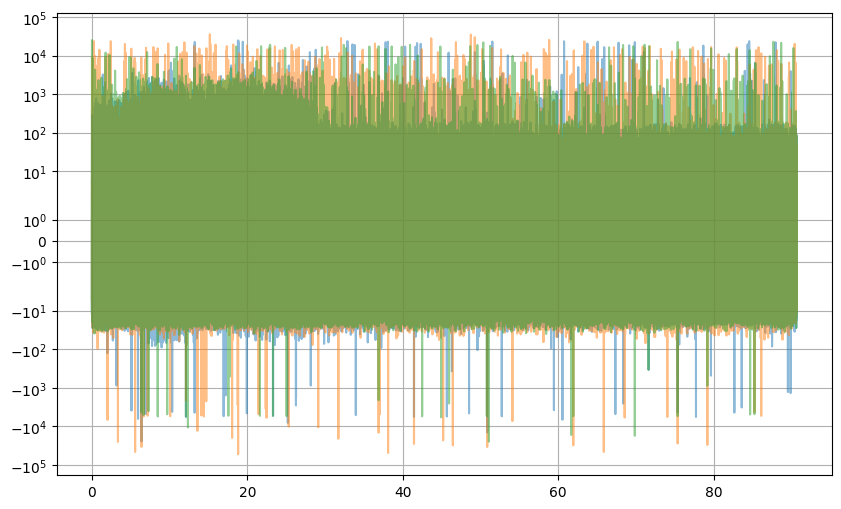

In [304]:
bl = {}
for i in range(5,8):
    bl[i] = df_clean[f"QT2T_{i}_q_base_line"]
t = df_clean["group_time"]

bl5 = np.array(bl[5])
bl6 = np.array(bl[6])
bl7 = np.array(bl[7])

t = np.array(t)

plt.figure(figsize=(10,6))
plt.grid()
plt.yscale("symlog")
#plt.xscale("log")
for i in range(5,8):
    plt.plot(t*10**-9/3600,bl[i], alpha=0.5  )

Name            |             Min |             Max |            Mean |             Std
------------------------------------------------------------------------------------------
base_line_5     | -24525          | 24527           |          29.161 |         319.321
base_line_6     | -52597          | 35535           |          49.264 |         571.839
base_line_7     | -24676          | 25076           |          37.513 |         317.730


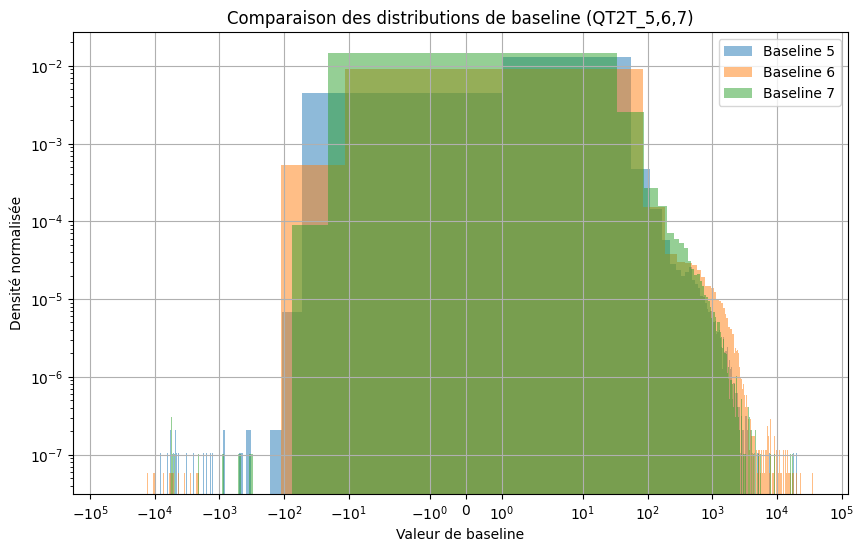

In [305]:
print(f"{'Name':<15} | {'Min':>15} | {'Max':>15} | {'Mean':>15} | {'Std':>15}")
print("-" * 90)
        
# Récupération des données
bl = {}
for i in range(5, 8):
    bl[i] = np.array(df_clean[f"QT2T_{i}_q_base_line"])

    print(f"{f'base_line_{i}':<15} | {bl[i].min():<15} | {bl[i].max():<15} | {bl[i].mean():15.3f} | {bl[i].std():15.3f}")


# Histogrammes comparés
density_hist = True
plt.figure(figsize=(10,6))
plt.hist(bl[5], bins=900, alpha=0.5, label="Baseline 5", density=density_hist)
plt.hist(bl[6], bins=900, alpha=0.5, label="Baseline 6", density=density_hist)
plt.hist(bl[7], bins=900, alpha=0.5, label="Baseline 7", density=density_hist)
plt.xscale("symlog")
plt.yscale("log")
plt.xlabel("Valeur de baseline")
plt.ylabel("Densité normalisée")
plt.title("Comparaison des distributions de baseline (QT2T_5,6,7)")
plt.legend()
plt.grid(True)
plt.show()


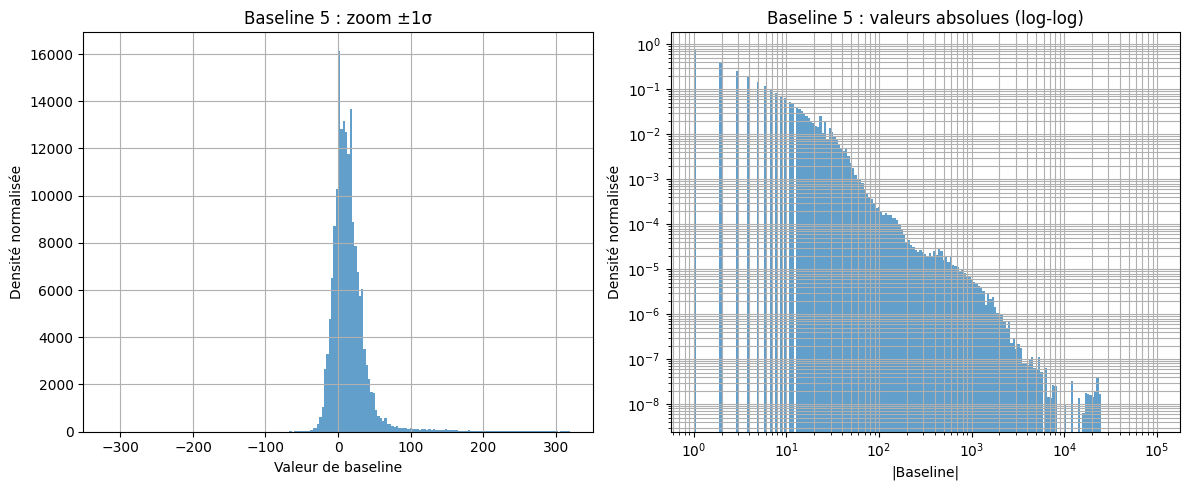

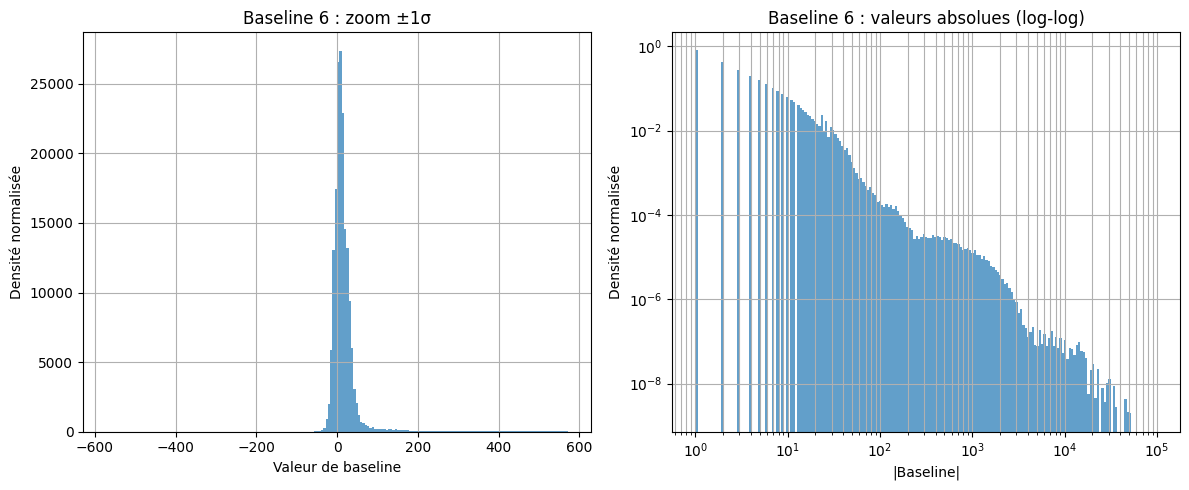

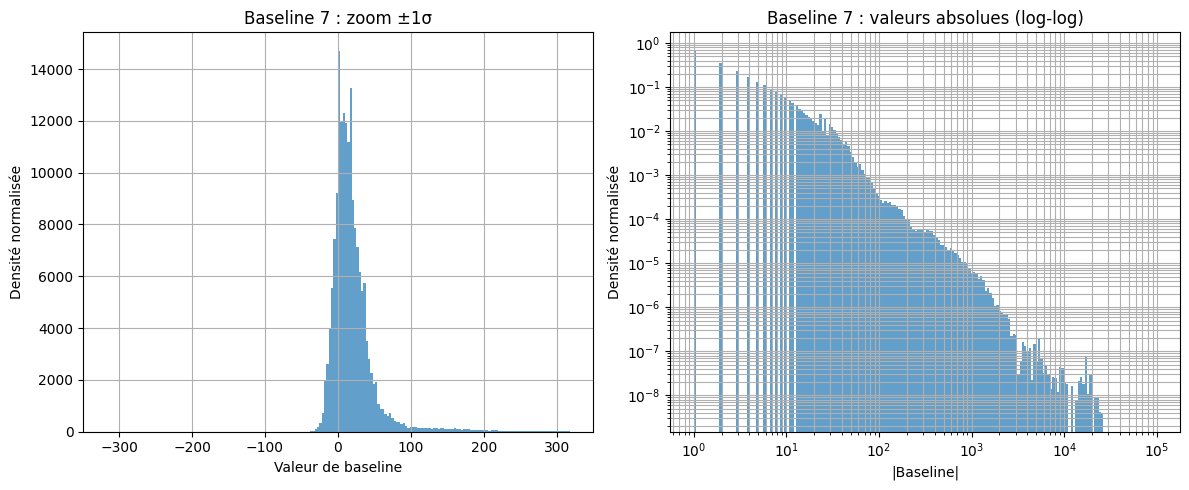

In [306]:
n=1
for i in range(5,8):

    mean, std = bl[i].mean(), bl[i].std()
    lim = n*std   # zoom à ±nσ

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Histogramme zoomé autour de 0
    axes[0].hist(bl[i], bins=200, range=(-lim, lim), density=False, alpha=0.7)
    axes[0].set_title(f"Baseline {i} : zoom ±{n}σ")
    axes[0].set_xlabel("Valeur de baseline")
    axes[0].set_ylabel("Densité normalisée")
    axes[0].grid(True)

    # Histogramme log des valeurs absolues (outliers visibles)
    axes[1].hist(np.abs(bl[i]), bins=np.logspace(0, 5, 200), density=True, alpha=0.7)
    axes[1].set_xscale("log")
    axes[1].set_yscale("log")
    axes[1].set_title(f"Baseline {i} : valeurs absolues (log-log)")
    axes[1].set_xlabel("|Baseline|")
    axes[1].set_ylabel("Densité normalisée")
    axes[1].grid(True, which="both")

    plt.tight_layout()
    plt.show()
